In [1]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Dataset of Diabetes .csv')
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [7]:
X = df.loc[:,['ID',	'No_Pation', 'AGE',	'Urea',	'Cr', 'HbA1c', 'Chol', 'TG', 'HDL',	'LDL', 'VLDL', 'BMI']]
X.head()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,502,17975,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
1,735,34221,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0
2,420,47975,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
3,680,87656,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
4,504,34223,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0


In [9]:
Y = df.loc[:, 'CLASS']
Y

0       N
1       N
2       N
3       N
4       N
       ..
995     Y
996    Y 
997    Y 
998    Y 
999    Y 
Name: CLASS, Length: 1000, dtype: object

In [10]:
model = ExtraTreesClassifier()
model.fit(X, Y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [11]:
print(model.feature_importances_)

[0.03937993 0.04618377 0.11764892 0.0296417  0.03232824 0.28260664
 0.0567693  0.05411345 0.03142397 0.03699245 0.04318852 0.22972311]


In [15]:
feature_rank = pd.Series(model.feature_importances_,index= X.columns)
feature_rank

ID           0.039380
No_Pation    0.046184
AGE          0.117649
Urea         0.029642
Cr           0.032328
HbA1c        0.282607
Chol         0.056769
TG           0.054113
HDL          0.031424
LDL          0.036992
VLDL         0.043189
BMI          0.229723
dtype: float64

In [16]:
feature_rank.nlargest(5)

HbA1c    0.282607
BMI      0.229723
AGE      0.117649
Chol     0.056769
TG       0.054113
dtype: float64

<Axes: >

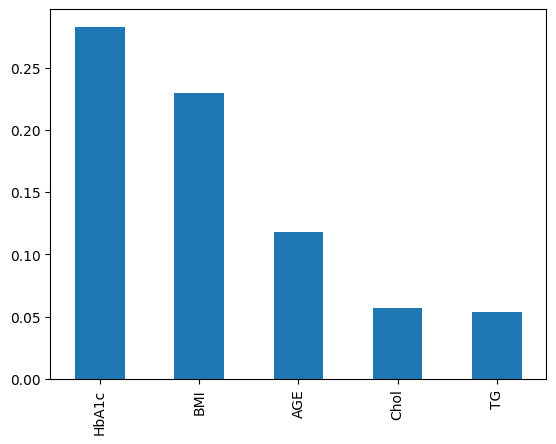

In [17]:
feature_rank.nlargest(5).plot.bar()